In [40]:
# Libraries loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib notebook
import seaborn as sns

In [2]:
# path to all data files
path4 = "Data/train.csv"

In [3]:
#reading csv files 
train = pd.read_csv(path4)

In [4]:
# data review
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
# Train data frame info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
#data types definition
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [9]:
#convert Date column to date field
train['Date'] =pd.to_datetime(train['Date'])

In [10]:
#verifying the Date data type conversion
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [11]:
# adding week and year column to the train data frame
train['Week'] = train.Date.dt.week
train['Year'] = train.Date.dt.year

In [12]:
# verifying data frame with new columns
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year
0,1,1,2010-02-05,24924.50,False,5,2010
1,1,1,2010-02-12,46039.49,True,6,2010
2,1,1,2010-02-19,41595.55,False,7,2010
3,1,1,2010-02-26,19403.54,False,8,2010
4,1,1,2010-03-05,21827.90,False,9,2010


In [19]:
# find unique values of year
train_year = train['Year'].unique()
train_year

array([2010, 2011, 2012], dtype=int64)

<IPython.core.display.Javascript object>


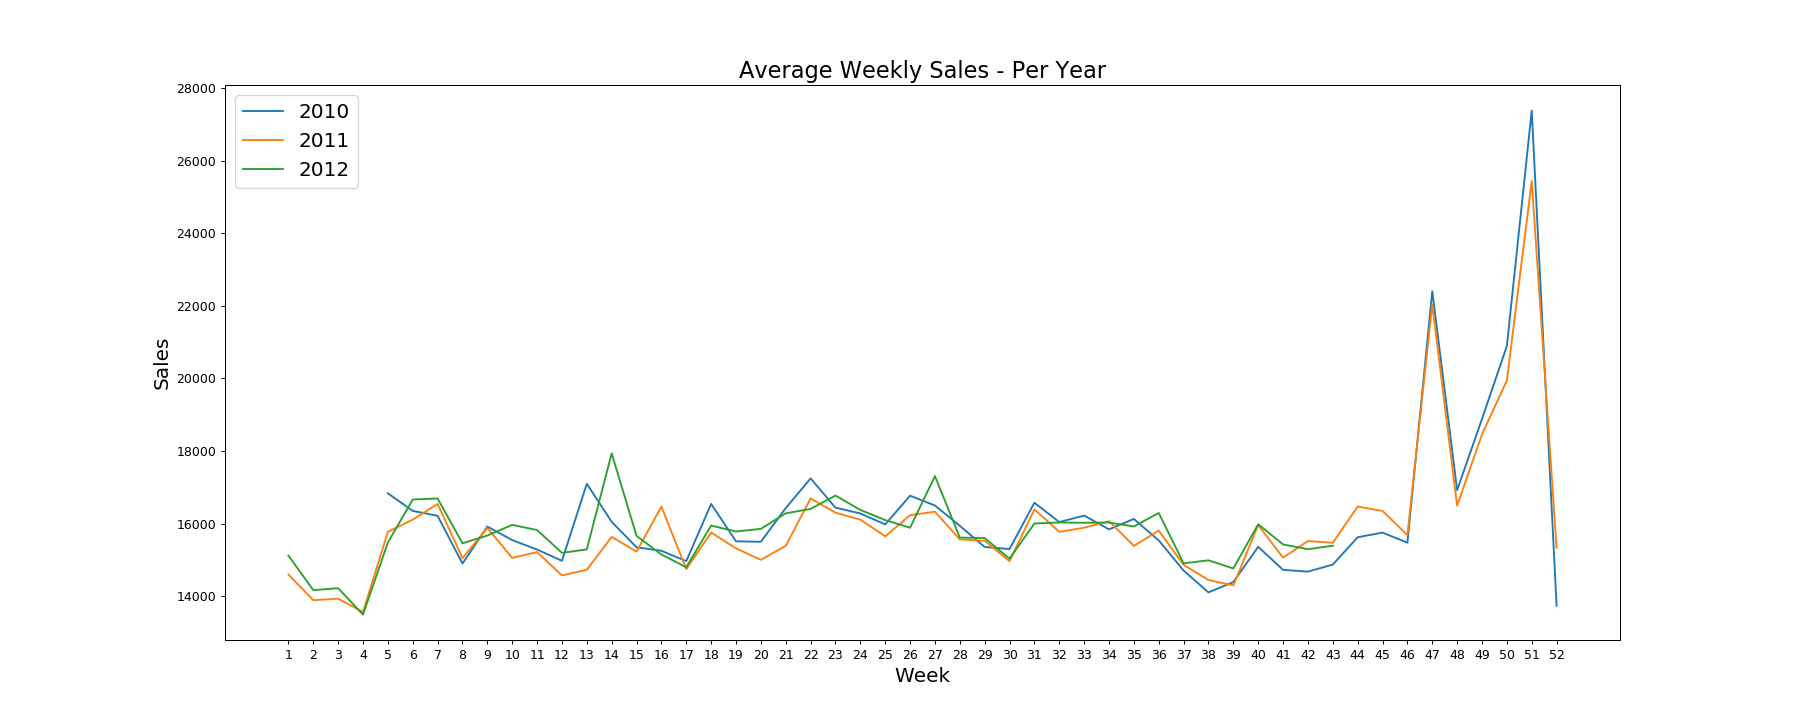

In [53]:
#Find average of weekly sales for each year. Plot line graph for weekly average sale for each year. 
weekly_sales_2010 = train[train.Year==2010]['Weekly_Sales'].groupby(train['Week']).mean()
weekly_sales_2011 = train[train.Year==2011]['Weekly_Sales'].groupby(train['Week']).mean()
weekly_sales_2012 = train[train.Year==2012]['Weekly_Sales'].groupby(train['Week']).mean()
plt.figure(figsize=(20,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)
#plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()
plt.savefig("results/average_weekly_sales_per_year.png")

<IPython.core.display.Javascript object>


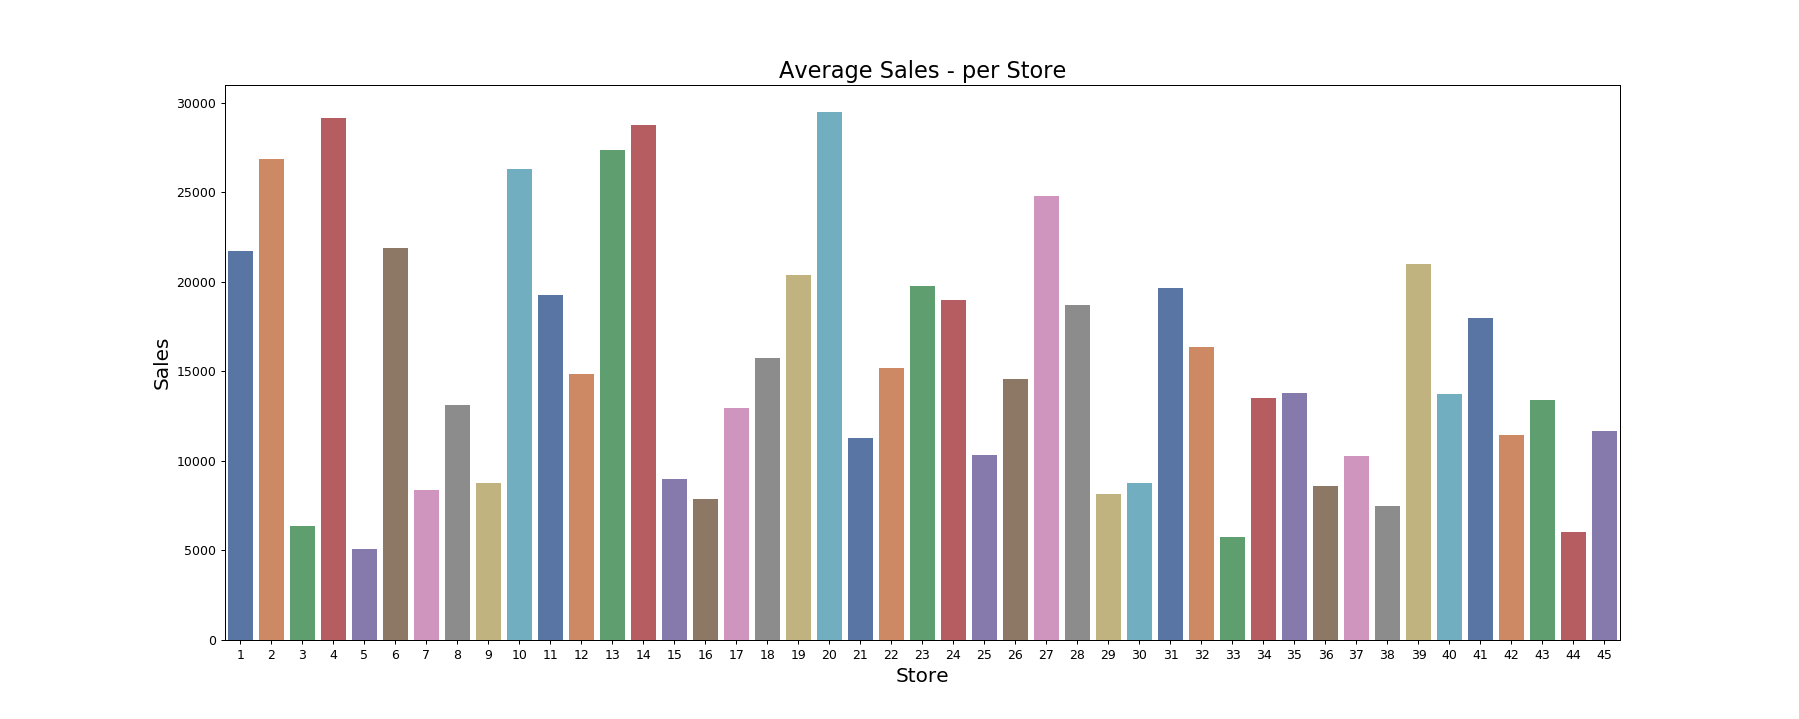

In [54]:
#Find average of sales for each store. Plot bar graph for average sale for each store.

weekly_sales = train['Weekly_Sales'].groupby(train['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values,palette="deep")
#plt.grid()
#plt.xticks(tick_locations)
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()
plt.savefig("results/average_sales_per_store.png")

<IPython.core.display.Javascript object>


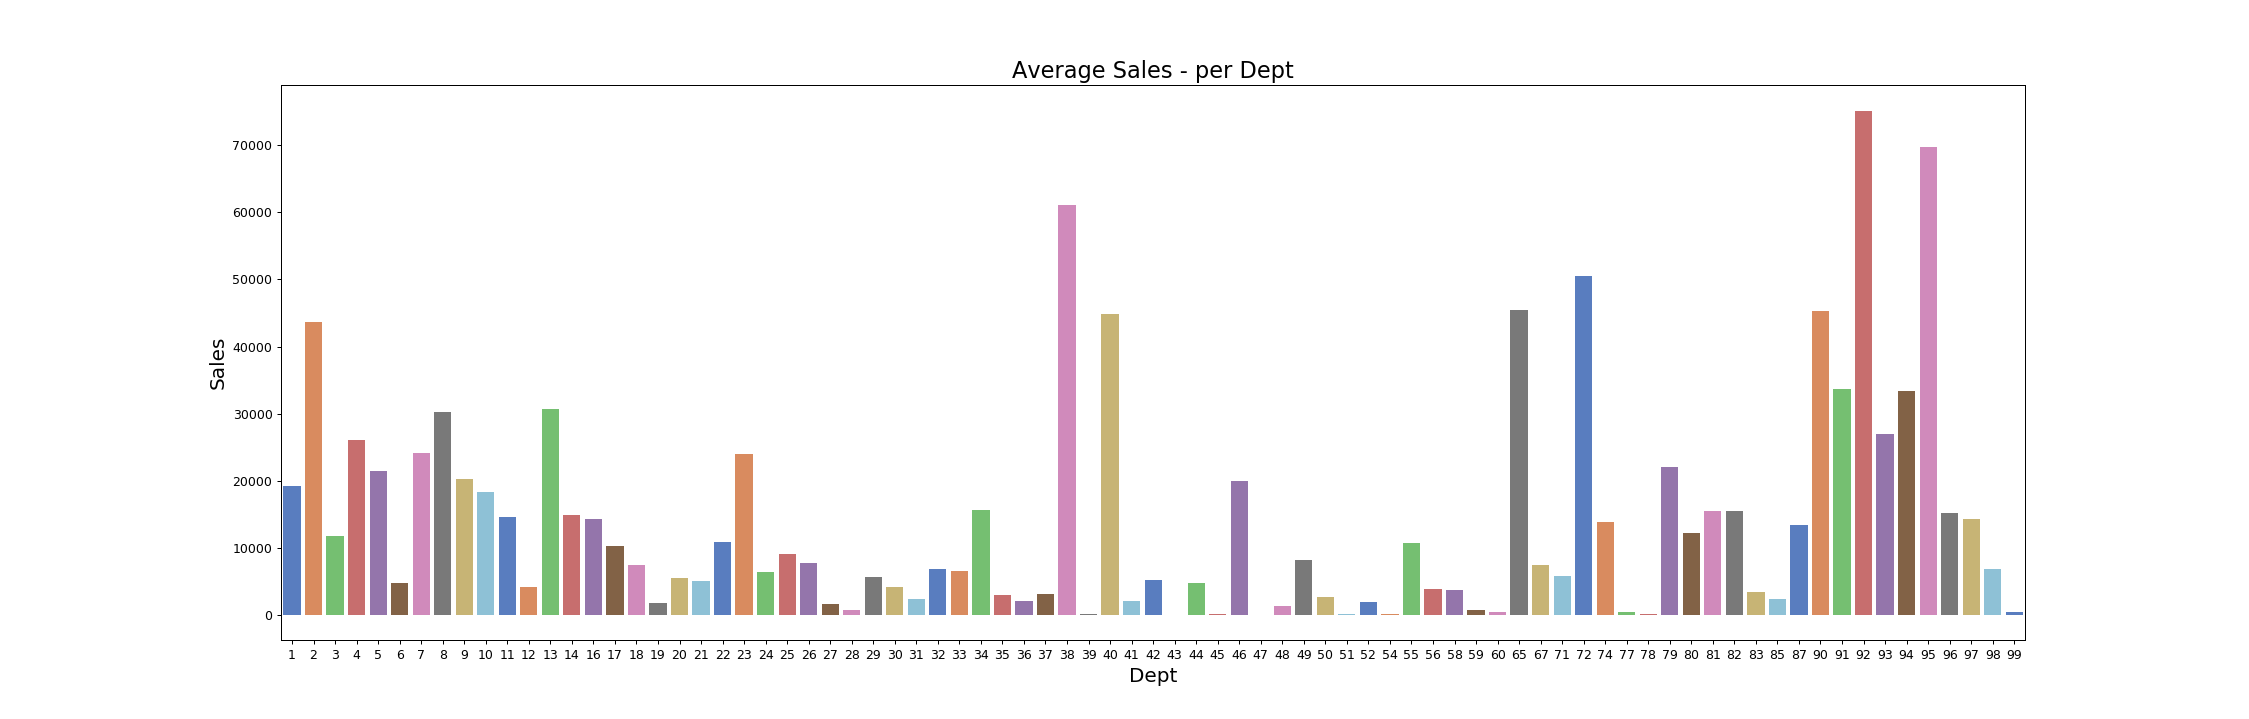

In [55]:
#Find average of sales for each store. Plot bar graph for average sale for each store.
weekly_sales = train['Weekly_Sales'].groupby(train['Dept']).mean()
plt.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values,palette="muted")
#plt.grid()
plt.title('Average Sales - per Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()
plt.savefig("results/average_sales_per_dept.png")

In [49]:
#re-sort on column weekly sale to find out max sales
train_sort = train.sort_values(by='Weekly_Sales', ascending = False)
train_sort

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year
95373,10,72,2010-11-26,693099.36,True,47,2010
338013,35,72,2011-11-25,649770.18,True,47,2011
95425,10,72,2011-11-25,630999.19,True,47,2011
337961,35,72,2010-11-26,627962.93,True,47,2010
135665,14,72,2010-11-26,474330.10,True,47,2010
...,...,...,...,...,...,...,...
271300,28,32,2011-03-25,-1321.48,False,12,2011
153916,16,47,2012-03-09,-1699.00,False,10,2012
417801,45,47,2010-02-26,-1750.00,False,8,2010
336495,35,47,2011-09-02,-3924.00,False,35,2011


In [50]:
#list count, mean,std,min,25%,50%,75% and max values for all dta columns in trian data frame
train.describe()

,Store,Dept,Weekly_Sales,Week,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,25.826762,2010.968591
std,12.785297,30.492054,22711.183519,14.151887,0.796876
min,1.000000,1.000000,-4988.940000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,14.000000,2010.000000
50%,22.000000,37.000000,7612.030000,26.000000,2011.000000
75%,33.000000,74.000000,20205.852500,38.000000,2012.000000
max,45.000000,99.000000,693099.360000,52.000000,2012.000000


<IPython.core.display.Javascript object>


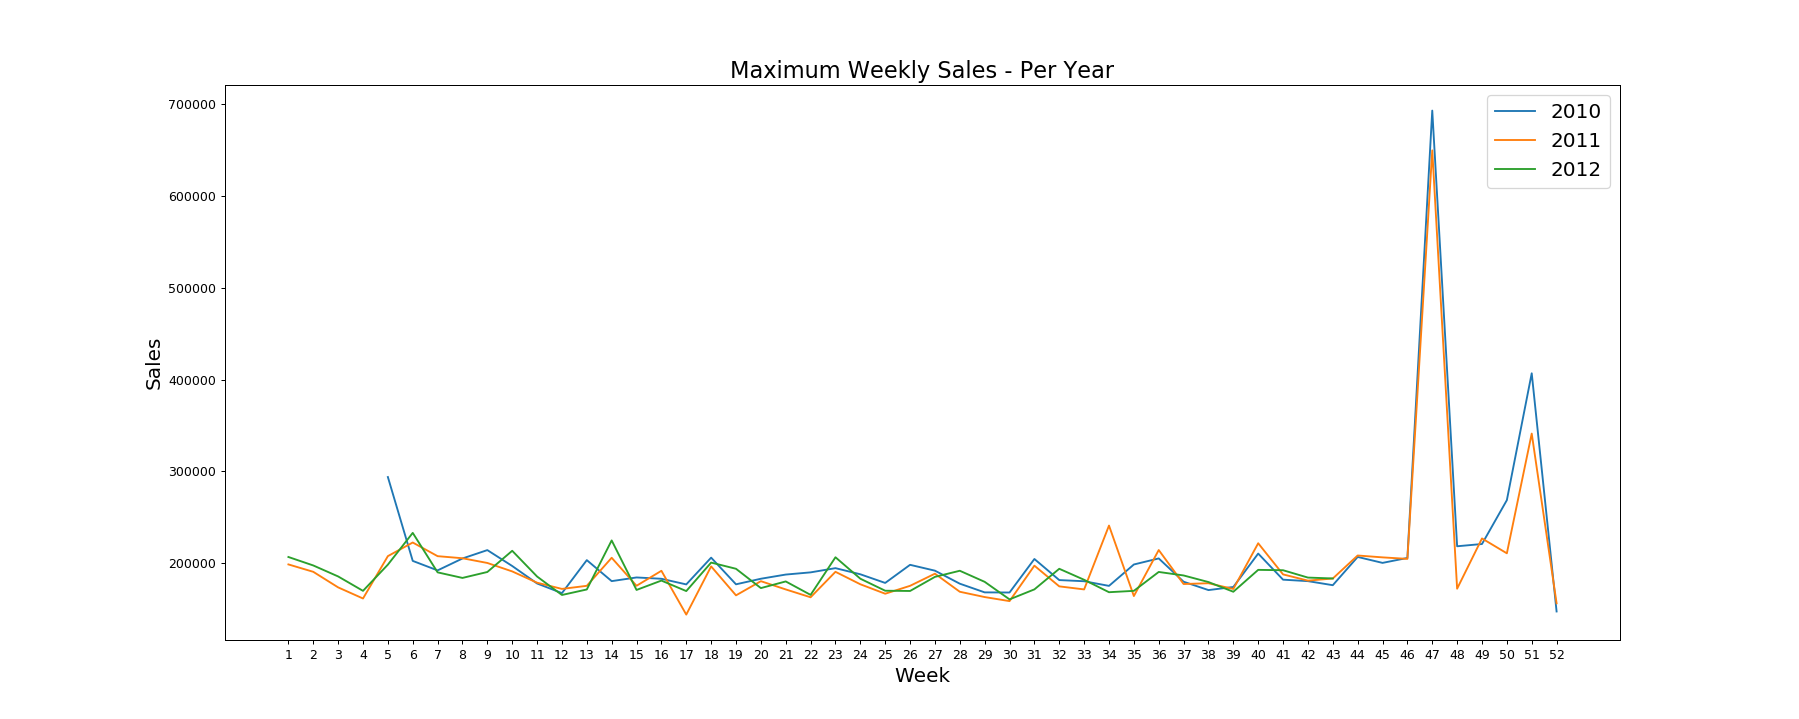

In [56]:
#Find maxiumum of weekly sales for each year. Plot line graph for maximum weekly sale per year.
weekly_sales_2010 = train[train.Year==2010]['Weekly_Sales'].groupby(train['Week']).max()
weekly_sales_2011 = train[train.Year==2011]['Weekly_Sales'].groupby(train['Week']).max()
weekly_sales_2012 = train[train.Year==2012]['Weekly_Sales'].groupby(train['Week']).max()
plt.figure(figsize=(20,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)
#plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Maximum Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()
plt.savefig("results/max_weekly_sales_per_year.png")